In [4]:
import math
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.integrate import odeint

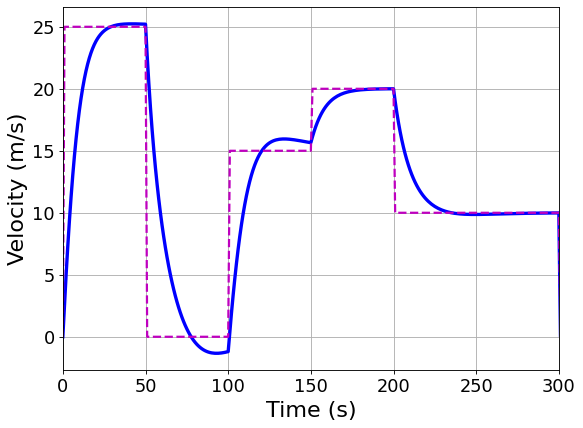

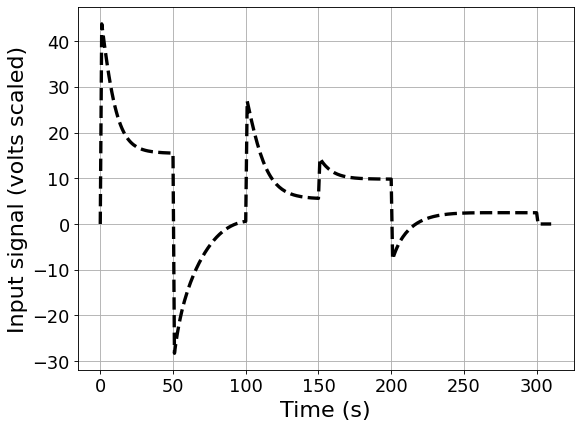

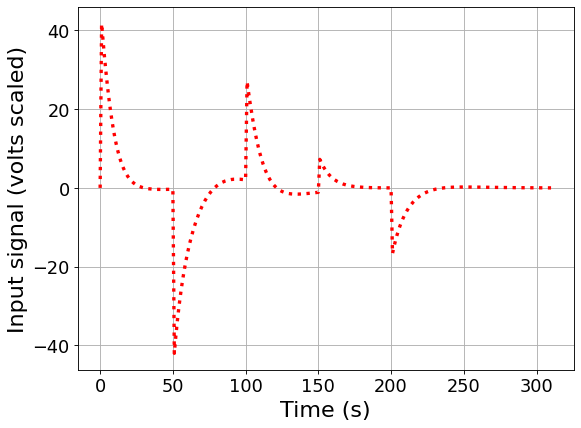

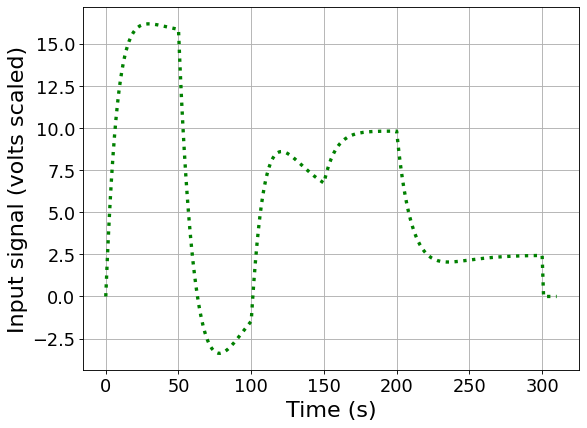

In [61]:
# Define a function that computes acceleration for a car
def car(v, t, u, load):
    # Inputs
    # v - Speed of car in m/s
    # t - Time in seconds
    # u - Drive control signal fed to electric motor 
    # load - Weight of passengers in the car
    Cd  = 0.24     # Drag coefficient
    rho = 1.225    # Density of air in kg/m^3
    A   = 5.0      # Cross-sectional area in m^2 that cuts through wind during motion
    Fp  = 30.0     # Thrust parameter in N/V
    m   = 500.0    # Mass of car in kg 
    
    # Calculate acceleration
    dv_by_dt = (1.0/(m+load)) * ((Fp * u) - (0.5*rho*Cd*A*(v**2)))
    return dv_by_dt

# Initialization
tf = 310
nsteps = 311
delta_t = tf / (nsteps-1)
ts = np.linspace(0, tf, nsteps)

# Simulate input to linear system
# Input  - Varying set points as a function of time 
# Initial velocity at time t=0 - v0
step = np.zeros(nsteps)
load = 1.0 # in kg
# Velocity initial condition
v0 = 0.0
vs = np.zeros(nsteps)          # This variable stores simulated output velocities
                               # and does nothing else
sp_store = np.zeros(nsteps)    # This variable stores set pointvelocities
                               # and does nothing else 
es = np.zeros(nsteps)          # This variable stores the simulated error signal
                               # and does nothing else   
u_store = np.zeros(nsteps)     # This variable stores the simulated error signal
                               # and does nothing else
prop_store = np.zeros(nsteps)  # This variable stores the simulated error signal
                               # and does nothing else  
int_store = np.zeros(nsteps)   # This variable stores the simulated error signal
                               # and does nothing else     
sp = 25.0                      # Initial value changes during performance simulations

ubias = 0
Kc = 1.667
tauI = 20.0
sum_int = 0.0

# Simulate response of linear system
# Output - v
for i in np.arange(nsteps-11):
    if (i == 50):
        sp = 0
    elif (i == 100):
        sp = 15
    elif (i == 150):
        sp = 20
    elif (i >= 200):
        sp = 10
        
    sp_store[i+1] = sp
    error = sp - v0
    es[i+1] = error
    sum_int = sum_int + error*delta_t
    u = ubias + Kc*error + (Kc/tauI)*sum_int
    v = odeint(car, v0, [0, delta_t], args=(u, load))
    v0 = v[-1]
    vs[i+1] = v0
    
    u_store[i+1] = u
    int_store[i+1] = (Kc/tauI)*sum_int
    prop_store[i+1] = Kc*error
    
v0=0
fig1 = plt.figure(figsize=(8, 6), dpi=80)
plt.plot(ts, vs, 'b', linewidth=3, label='Simulated')
plt.plot(ts, sp_store, 'm--', linewidth=2, label='Set point desired')
plt.xlim([0,300])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Velocity (m/s)', fontsize=20)
plt.grid()

# Plot system input to electric motor drive
fig2 = plt.figure(figsize=(8, 6), dpi=80)
plt.plot(ts, u_store, 'k--', linewidth=3, label='Simulated')
#plt.xlim([30,50])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Input signal (volts scaled)', fontsize=20)
plt.grid()


# Plot proprtional term
fig3 = plt.figure(figsize=(8, 6), dpi=80)
plt.plot(ts, prop_store, 'r:', linewidth=3, label='Simulated')
#plt.xlim([30,50])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Input signal (volts scaled)', fontsize=20)
plt.grid()


# Plot integral term
fig3 = plt.figure(figsize=(8, 6), dpi=80)
plt.plot(ts, int_store, 'g:', linewidth=3, label='Simulated')
#plt.xlim([30,50])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Input signal (volts scaled)', fontsize=20)
plt.grid()

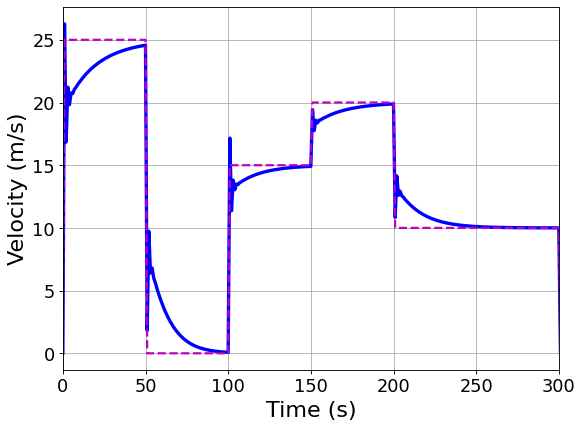

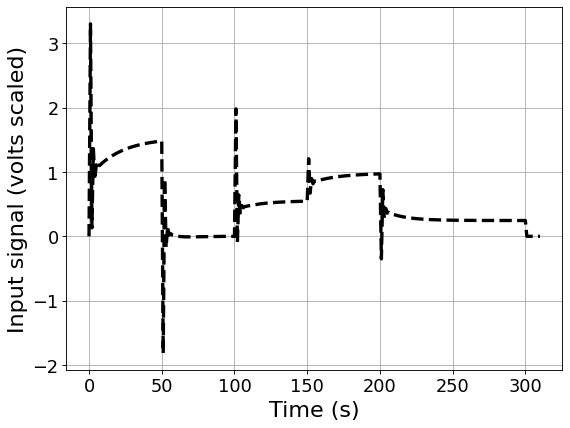

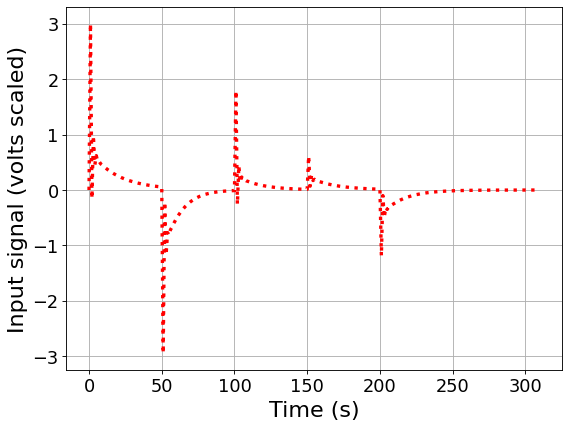

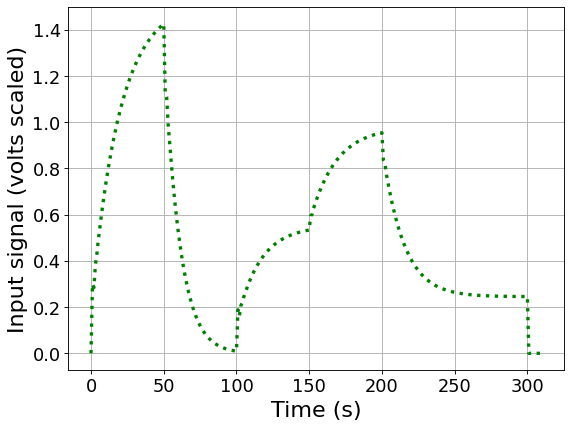

In [56]:
# Define a function that computes acceleration for a car
def rover(v, t, u, load):
    # Inputs
    # v - Speed of car in m/s
    # t - Time in seconds
    # u - Drive control signal fed to electric motor 
    # load - Weight of passengers in the car
    Cd  = 0.24     # Drag coefficient
    rho = 1.225    # Density of air in kg/m^3
    A   = 0.5      # Cross-sectional area in m^2 that cuts through wind during motion
    Fp  = 30.0     # Thrust parameter in N/V
    m   = 2.0    # Mass of car in kg 
    
    # Calculate acceleration
    dv_by_dt = (1.0/(m+load)) * ((Fp * u) - (0.5*rho*Cd*A*(v**2)))
    return dv_by_dt

# Initialization
tf = 310
nsteps = 311
delta_t = tf / (nsteps-1)
ts = np.linspace(0, tf, nsteps)

# Simulate input to linear system
# Input  - Varying set points as a function of time 
# Initial velocity at time t=0 - v0
step = np.zeros(nsteps)
load = 1.0 # in kg
# Velocity initial condition
v0 = 0.0
vs = np.zeros(nsteps)          # This variable stores simulated output velocities
                               # and does nothing else
sp_store = np.zeros(nsteps)    # This variable stores set pointvelocities
                               # and does nothing else 
es = np.zeros(nsteps)          # This variable stores the simulated error signal
                               # and does nothing else   
u_store = np.zeros(nsteps)     # This variable stores the simulated error signal
                               # and does nothing else
prop_store = np.zeros(nsteps)  # This variable stores the simulated error signal
                               # and does nothing else  
int_store = np.zeros(nsteps)   # This variable stores the simulated error signal
                               # and does nothing else     
sp = 25.0                      # Initial value changes during performance simulations

ubias = 0
Kc = 0.12   #4.4375
tauI = 10.0 #17.75
sum_int = 0.0

# Simulate response of linear system
# Output - v
for i in np.arange(nsteps-11):
    if (i == 50):
        sp = 0
    elif (i == 100):
        sp = 15
    elif (i == 150):
        sp = 20
    elif (i >= 200):
        sp = 10
        
    sp_store[i+1] = sp
    error = sp - v0
    es[i+1] = error
    sum_int = sum_int + error*delta_t
    u = ubias + Kc*error + (Kc/tauI)*sum_int
    v = odeint(rover, v0, [0, delta_t], args=(u, load))
    v0 = v[-1]
    vs[i+1] = v0
    
    u_store[i+1] = u
    int_store[i+1] = (Kc/tauI)*sum_int
    prop_store[i+1] = Kc*error
    
v0=0
fig1 = plt.figure(figsize=(8, 6), dpi=80)
plt.plot(ts, vs, 'b', linewidth=3, label='Simulated')
plt.plot(ts, sp_store, 'm--', linewidth=2, label='Set point desired')
plt.xlim([0,300])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Velocity (m/s)', fontsize=20)
plt.grid()

# Plot system input to electric motor drive
fig2 = plt.figure(figsize=(8, 6), dpi=80)
plt.plot(ts, u_store, 'k--', linewidth=3, label='Simulated')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Input signal (volts scaled)', fontsize=20)
plt.grid()


# Plot proprtional term
fig3 = plt.figure(figsize=(8, 6), dpi=80)
plt.plot(ts, prop_store, 'r:', linewidth=3, label='Simulated')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Input signal (volts scaled)', fontsize=20)
plt.grid()


# Plot integral term
fig3 = plt.figure(figsize=(8, 6), dpi=80)
plt.plot(ts, int_store, 'g:', linewidth=3, label='Simulated')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Input signal (volts scaled)', fontsize=20)
plt.grid()